In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [65]:
df = pd.read_csv('how AI influencing job role.csv')
df

,Job titiles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain
0,Communications Manager,98%,365,2546,0.143362,Communication & PR
1,Data Collector,95%,299,2148,0.139199,Data & IT
2,Data Entry,95%,325,2278,0.142669,Administrative & Clerical
3,Mail Clerk,95%,193,1366,0.141288,Leadership & Strategy
4,Compliance Officer,92%,194,1369,0.141709,Medical & Healthcare
...,...,...,...,...,...,...
4701,Singer,5%,686,2798,0.245175,Data & IT
4702,Airport,5%,556,2206,0.252040,Administrative & Clerical
4703,Director,5%,1316,4695,0.280298,Leadership & Strategy
4704,Nurse,5%,710,2594,0.273709,Medical & Healthcare


In [66]:
df.dtypes

Job titiles           object
AI Impact             object
Tasks                  int64
AI models              int64
AI_Workload_Ratio    float64
Domain                object
dtype: object

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4706 entries, 0 to 4705
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job titiles        4706 non-null   object 
 1   AI Impact          4706 non-null   object 
 2   Tasks              4706 non-null   int64  
 3   AI models          4706 non-null   int64  
 4   AI_Workload_Ratio  4706 non-null   float64
 5   Domain             4706 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 220.7+ KB


In [68]:
df.isnull().sum()

Job titiles          0
AI Impact            0
Tasks                0
AI models            0
AI_Workload_Ratio    0
Domain               0
dtype: int64

In [69]:
df.head()

,Job titiles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain
0,Communications Manager,98%,365,2546,0.143362,Communication & PR
1,Data Collector,95%,299,2148,0.139199,Data & IT
2,Data Entry,95%,325,2278,0.142669,Administrative & Clerical
3,Mail Clerk,95%,193,1366,0.141288,Leadership & Strategy
4,Compliance Officer,92%,194,1369,0.141709,Medical & Healthcare


In [70]:
df=df.rename(columns={'Job titiles': 'Job_titiles'})


In [71]:
# Check for infinite values before replacing
df[df['AI_Workload_Ratio'].isin([np.inf, -np.inf])]

,Job_titiles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain
3034,Charter Pilot,20%,2,0,inf,Medical & Healthcare
3035,Commercial Pilot,20%,2,0,inf,Supply Chain & Logistics
3036,Conductor,20%,2,0,inf,Law Enforcement
3037,Corporate Pilot,20%,2,0,inf,Construction
3184,Dog Groomer,20%,4,0,inf,Medical & Healthcare
3211,Constable,20%,3,0,inf,Data & IT
3322,Crossing Guard,20%,2,0,inf,Administrative & Clerical


In [72]:
df.isnull().sum()

Job_titiles          0
AI Impact            0
Tasks                0
AI models            0
AI_Workload_Ratio    0
Domain               0
dtype: int64

In [73]:
df =df.dropna()

In [74]:
df

,Job_titiles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain
0,Communications Manager,98%,365,2546,0.143362,Communication & PR
1,Data Collector,95%,299,2148,0.139199,Data & IT
2,Data Entry,95%,325,2278,0.142669,Administrative & Clerical
3,Mail Clerk,95%,193,1366,0.141288,Leadership & Strategy
4,Compliance Officer,92%,194,1369,0.141709,Medical & Healthcare
...,...,...,...,...,...,...
4701,Singer,5%,686,2798,0.245175,Data & IT
4702,Airport,5%,556,2206,0.252040,Administrative & Clerical
4703,Director,5%,1316,4695,0.280298,Leadership & Strategy
4704,Nurse,5%,710,2594,0.273709,Medical & Healthcare


In [75]:
df['AI_Workload_Ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)

In [76]:
df.isnull().sum()

Job_titiles          0
AI Impact            0
Tasks                0
AI models            0
AI_Workload_Ratio    7
Domain               0
dtype: int64

In [77]:
df['AI_Workload_Ratio'].fillna(df['AI_Workload_Ratio'].mode()[0],inplace=True)

In [78]:
# Check for infinite values after replacing
df[df['AI_Workload_Ratio'].isin([np.inf, -np.inf])]
#claer

,Job_titiles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain


In [79]:
#check duplicates values
df[df.duplicated()]
#claer

,Job_titiles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain


In [80]:
#sort data by AI Impact
df.sort_values (by = ['AI Impact'], inplace = False, ascending = False )

,Job_titiles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain
0,Communications Manager,98%,365,2546,0.143362,Communication & PR
2,Data Entry,95%,325,2278,0.142669,Administrative & Clerical
3,Mail Clerk,95%,193,1366,0.141288,Leadership & Strategy
1,Data Collector,95%,299,2148,0.139199,Data & IT
4,Compliance Officer,92%,194,1369,0.141709,Medical & Healthcare
...,...,...,...,...,...,...
4201,Hospitalist,10%,434,1789,0.242594,Data & IT
4202,Immunologist,10%,455,1815,0.250689,Administrative & Clerical
4203,Medical Doctor,10%,472,1673,0.282128,Leadership & Strategy
4204,Mental Health Clinician,10%,614,2293,0.267771,Medical & Healthcare


In [81]:
# Changing the data type in the AI Impact column to Integer while removing the % sign as well
df['AI Impact'] = (df['AI Impact'].str.rstrip('%').astype('int')) / 100

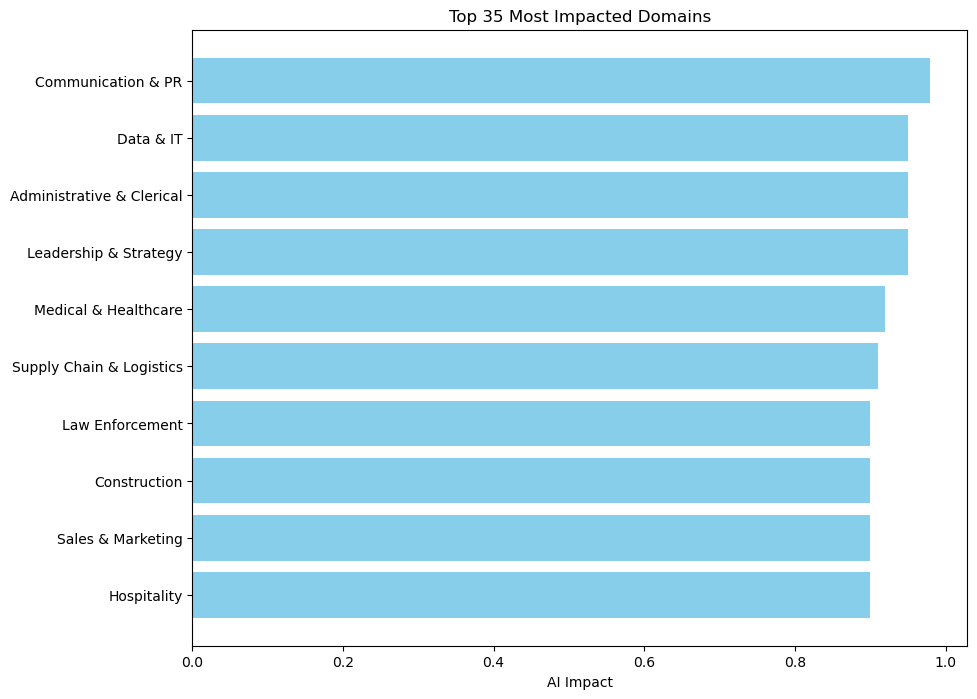

In [130]:
top_domains = df.nlargest(35, 'AI Impact')  # Selecting the top 35 impacted domains

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 8)) 
plt.barh(top_domains['Domain'], top_domains['AI Impact'], color='skyblue')
plt.xlabel('AI Impact')
plt.title('Top 35 Most Impacted Domains')
plt.gca().invert_yaxis()  
plt.show()

In [136]:
## Top 35 Most Impacted Domains
df[['Domain', 'AI Impact']].head(40)

,Domain,AI Impact
0,Communication & PR,0.98
1,Data & IT,0.95
2,Administrative & Clerical,0.95
3,Leadership & Strategy,0.95
4,Medical & Healthcare,0.92
5,Supply Chain & Logistics,0.91
6,Law Enforcement,0.90
7,Construction,0.90
8,Sales & Marketing,0.90
9,Hospitality,0.90


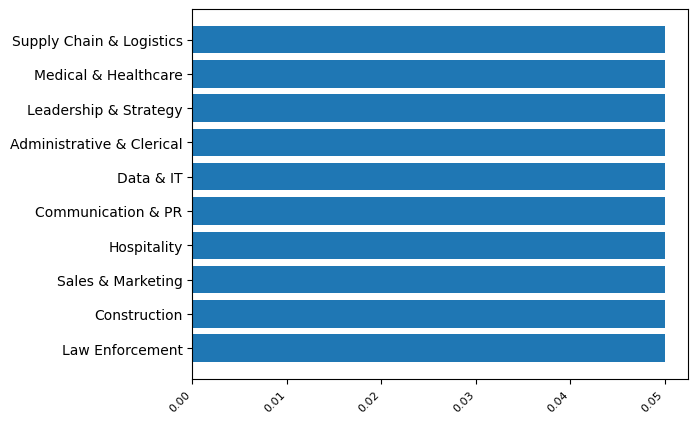

In [125]:
#Top 10 Domain Least Impacted by A
#Top 10 most not impacted Domain
job=df['Domain'].tail(10)
AIm=df['AI Impact'].tail(10)
plt.barh(job,AIm)
plt.xticks(rotation=45, ha='right', fontsize=8) 
plt.show()

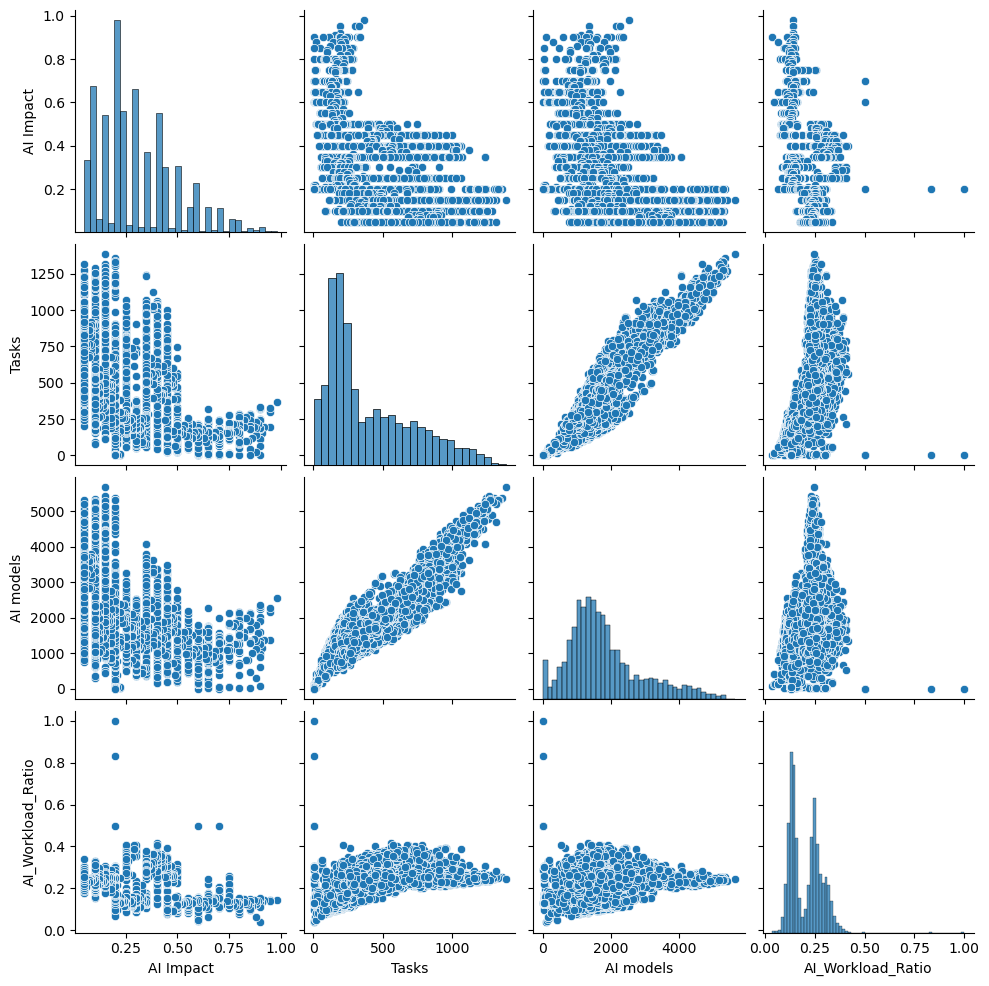

In [84]:
sns.pairplot(df)

<Axes: xlabel='AI Impact', ylabel='Domain'>

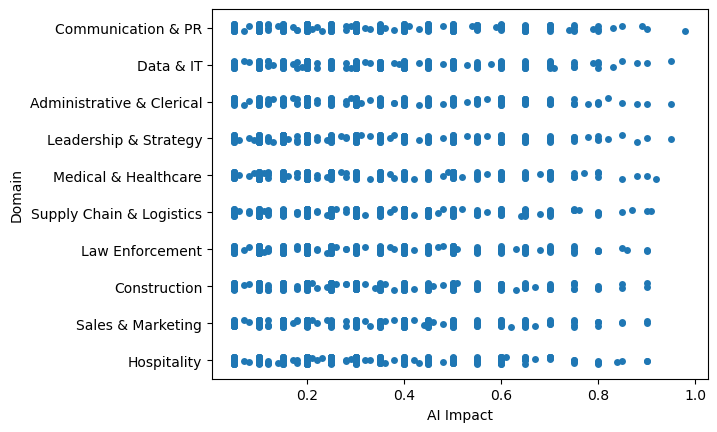

In [85]:
#The domains that experience the most significant impact from AI
sns.stripplot(x="AI Impact", y="Domain", data=df)


In [86]:
df.corr()

C:\Users\PC\AppData\Local\Temp\ipykernel_31040\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,AI Impact,Tasks,AI models,AI_Workload_Ratio
AI Impact,1.000000,-0.419760,-0.413176,-0.286784
Tasks,-0.419760,1.000000,0.928350,0.631939
AI models,-0.413176,0.928350,1.000000,0.348340
AI_Workload_Ratio,-0.286784,0.631939,0.348340,1.000000


In [87]:
df.corr()['AI_Workload_Ratio']

C:\Users\PC\AppData\Local\Temp\ipykernel_31040\3877953800.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['AI_Workload_Ratio']


AI Impact           -0.286784
Tasks                0.631939
AI models            0.348340
AI_Workload_Ratio    1.000000
Name: AI_Workload_Ratio, dtype: float64

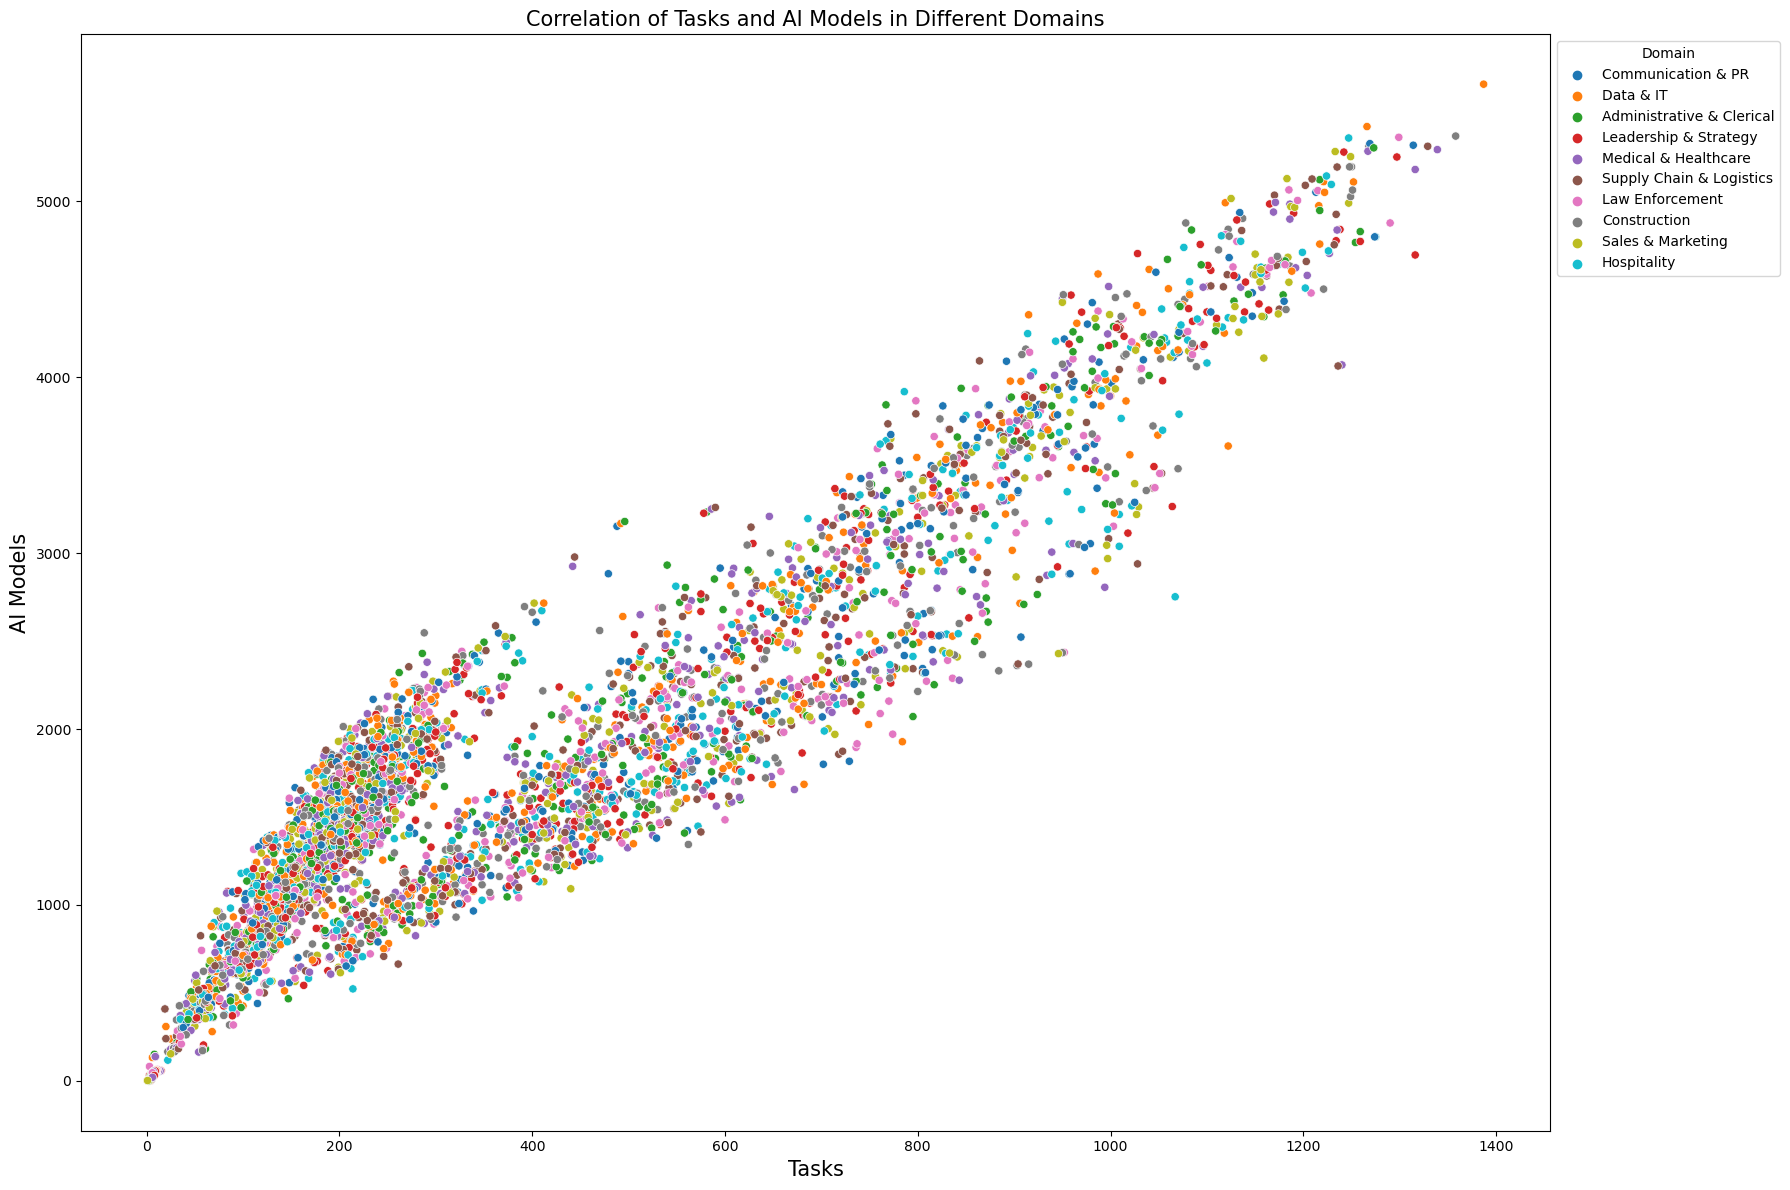

In [88]:
#We create a scatterplot that shows the Relationship between Tasks and AI Models by Domain

plt.figure(figsize=(18, 12))
sns.scatterplot(data=df, x='Tasks', y='AI models', hue='Domain')
plt.title('Correlation of Tasks and AI Models in Different Domains', fontsize=15)
plt.xlabel('Tasks', fontsize=15)
plt.ylabel('AI Models', fontsize=15)
plt.legend(title='Domain', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

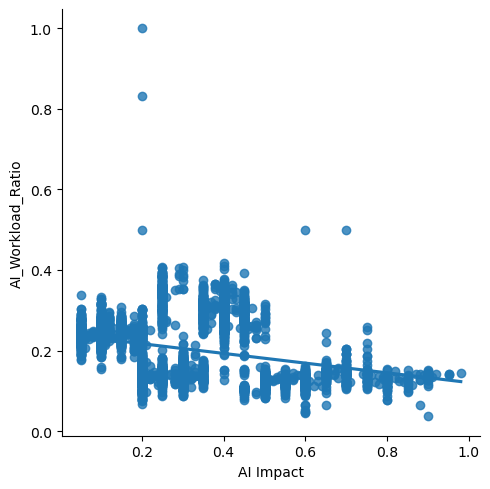

In [89]:
sns.lmplot(x='AI Impact' , y='AI_Workload_Ratio', data=df, fit_reg=True, ci=None)

<Axes: ylabel='Frequency'>

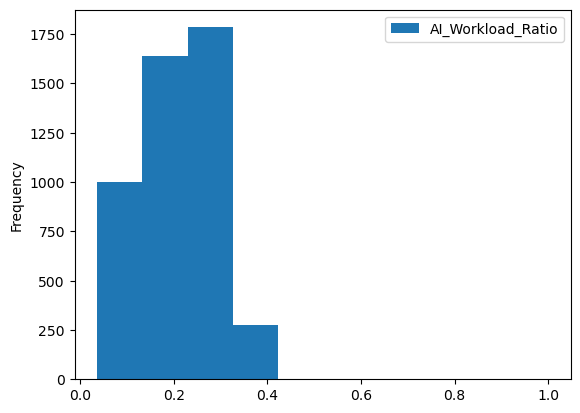

In [90]:
df.plot.hist(y='AI_Workload_Ratio') 

In [91]:
df.Job_titiles.value_counts()

Communications Manager       1
Certified Medication Aide    1
Medical Office Manager       1
Medical Liaison              1
Medical Examiner             1
                            ..
Claims Examiner              1
Claim Specialist             1
Adjuster                     1
Safety Specialist            1
Technician                   1
Name: Job_titiles, Length: 4706, dtype: int64

In [92]:
df.Domain.value_counts()

Communication & PR           471
Data & IT                    471
Administrative & Clerical    471
Leadership & Strategy        471
Medical & Healthcare         471
Supply Chain & Logistics     471
Law Enforcement              470
Construction                 470
Sales & Marketing            470
Hospitality                  470
Name: Domain, dtype: int64

In [93]:
df

,Job_titiles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain
0,Communications Manager,0.98,365,2546,0.143362,Communication & PR
1,Data Collector,0.95,299,2148,0.139199,Data & IT
2,Data Entry,0.95,325,2278,0.142669,Administrative & Clerical
3,Mail Clerk,0.95,193,1366,0.141288,Leadership & Strategy
4,Compliance Officer,0.92,194,1369,0.141709,Medical & Healthcare
...,...,...,...,...,...,...
4701,Singer,0.05,686,2798,0.245175,Data & IT
4702,Airport,0.05,556,2206,0.252040,Administrative & Clerical
4703,Director,0.05,1316,4695,0.280298,Leadership & Strategy
4704,Nurse,0.05,710,2594,0.273709,Medical & Healthcare


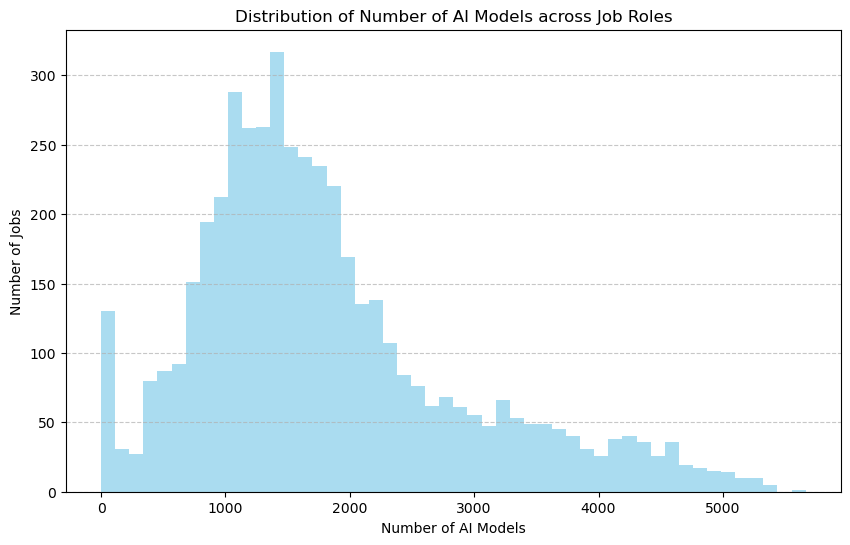

In [94]:
# Plotting the distribution of the number of AI models across job roles
plt.figure(figsize=(10, 6))
plt.hist(df['AI models'], bins=50, color='skyblue', alpha=0.7)
plt.title('Distribution of Number of AI Models across Job Roles')
plt.xlabel('Number of AI Models')
plt.ylabel('Number of Jobs')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

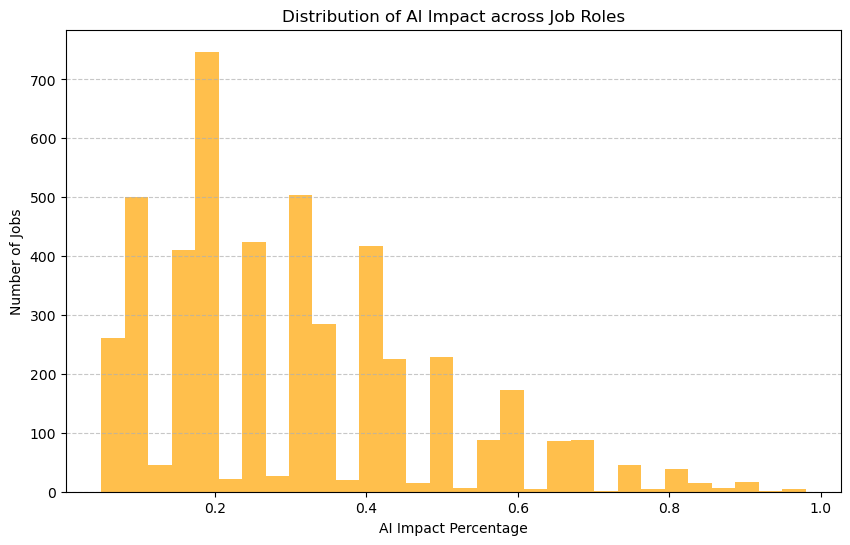

In [95]:
# Plotting the distribution of AI Impact across all job roles
plt.figure(figsize=(10, 6))
plt.hist(df['AI Impact'], bins=30, color='orange', alpha=0.7)
plt.title('Distribution of AI Impact across Job Roles')
plt.xlabel('AI Impact Percentage')
plt.ylabel('Number of Jobs')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

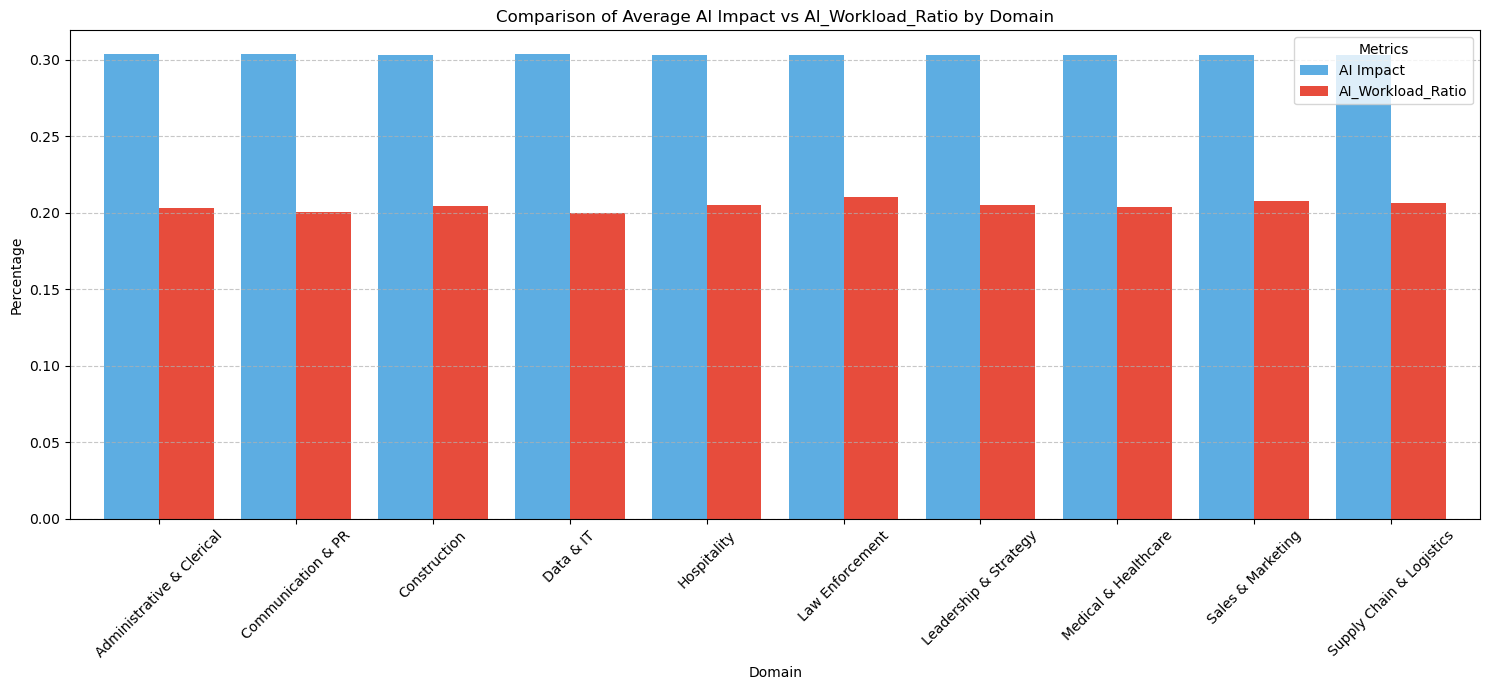

In [96]:
# Grouping by 'Domain' and calculating the mean AI Impact and AI_Workload_Ratio for each domain
domain_comparison = df.groupby('Domain')[['AI Impact', 'AI_Workload_Ratio']].mean()

# Plotting the clustered bar chart
ax = domain_comparison.plot(kind='bar', figsize=(15, 7), color=['#5DADE2', '#E74C3C'], width=0.8)
plt.title('Comparison of Average AI Impact vs AI_Workload_Ratio by Domain')
plt.ylabel('Percentage')
plt.xlabel('Domain')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend(title="Metrics")
plt.show()

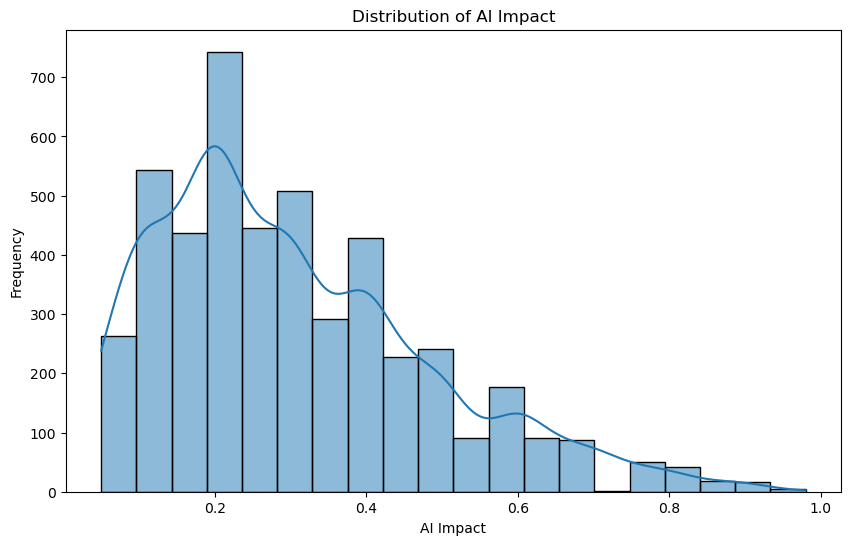

In [97]:
# Distribution of AI Impact
plt.figure(figsize=(10, 6))
sns.histplot(df['AI Impact'], bins=20, kde=True)
plt.title('Distribution of AI Impact')
plt.xlabel('AI Impact')
plt.ylabel('Frequency')
plt.show()


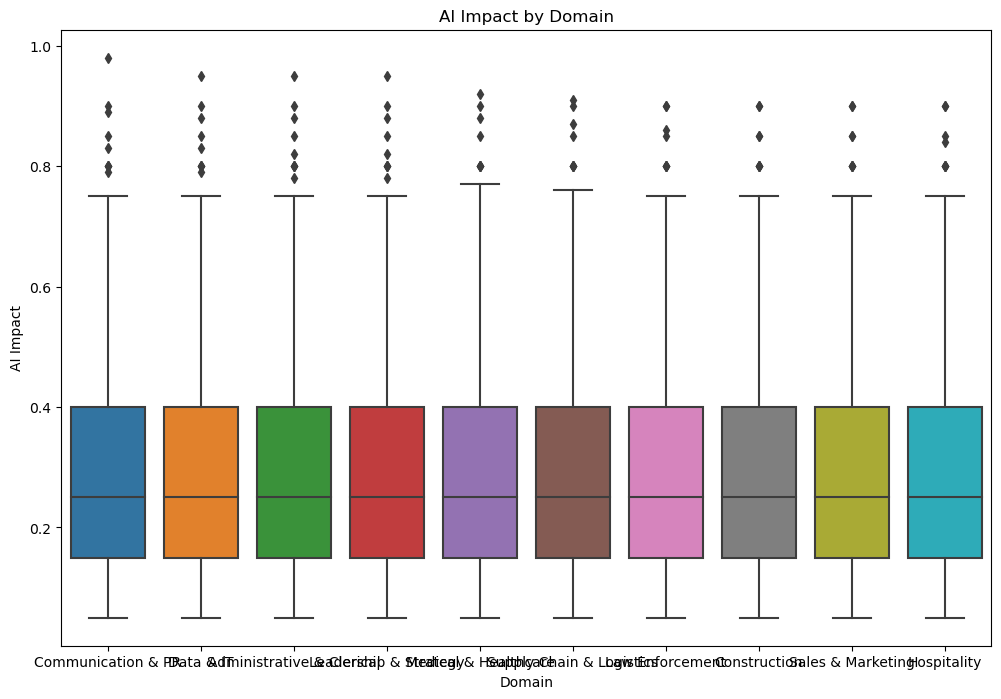

In [98]:
# Boxplot to identify outliers
plt.figure(figsize=(12, 8))
sns.boxplot(x='Domain', y='AI Impact', data=df)
plt.title('AI Impact by Domain')
plt.show()

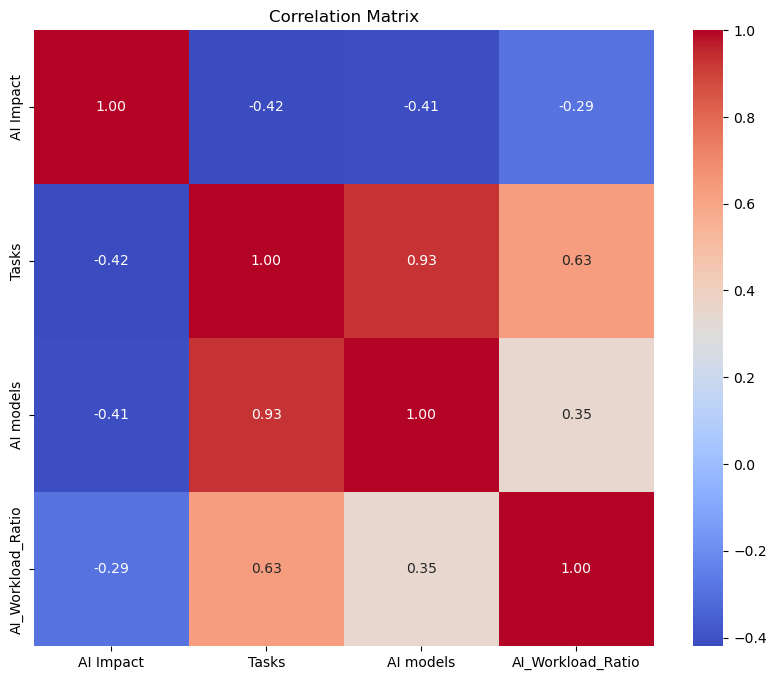

In [99]:
# Correlation matrix
correlation_matrix = df[['AI Impact', 'Tasks', 'AI models', 'AI_Workload_Ratio']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

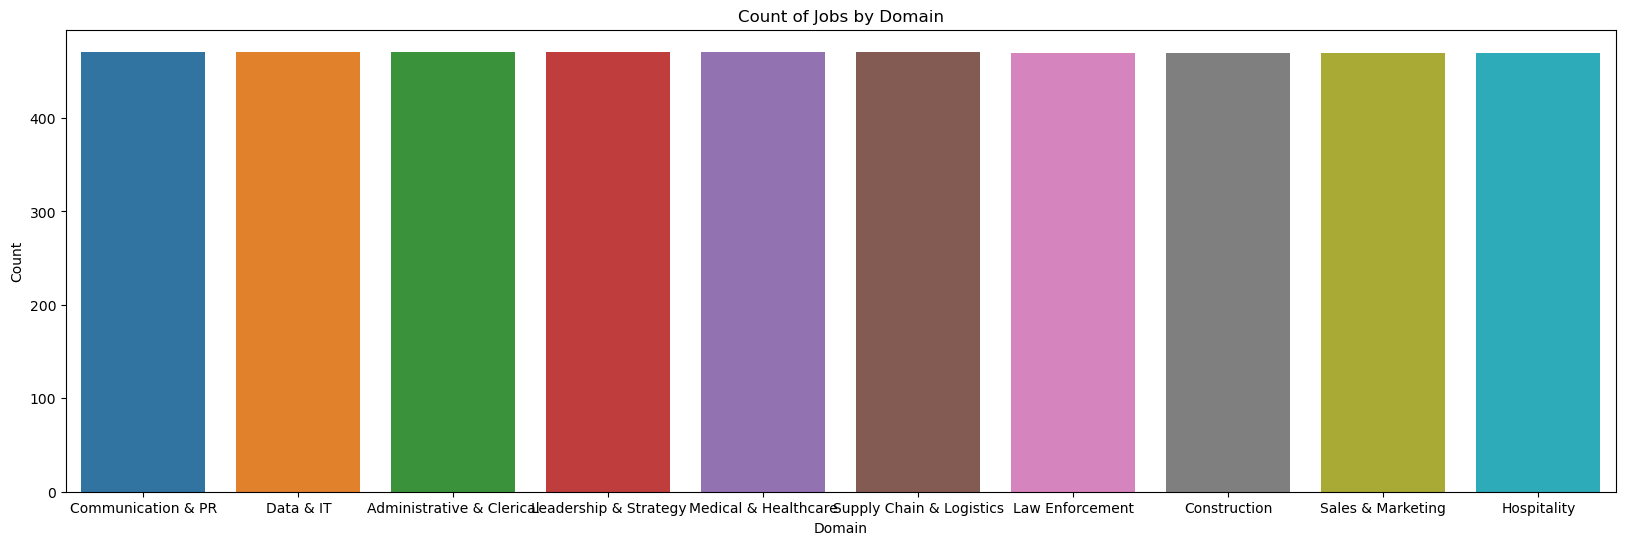

In [100]:
# Countplot for categorical column 'Domain'
plt.figure(figsize=(20, 6))
sns.countplot(x='Domain', data=df)
plt.title('Count of Jobs by Domain')
plt.xlabel('Domain')
plt.ylabel('Count')
plt.show()

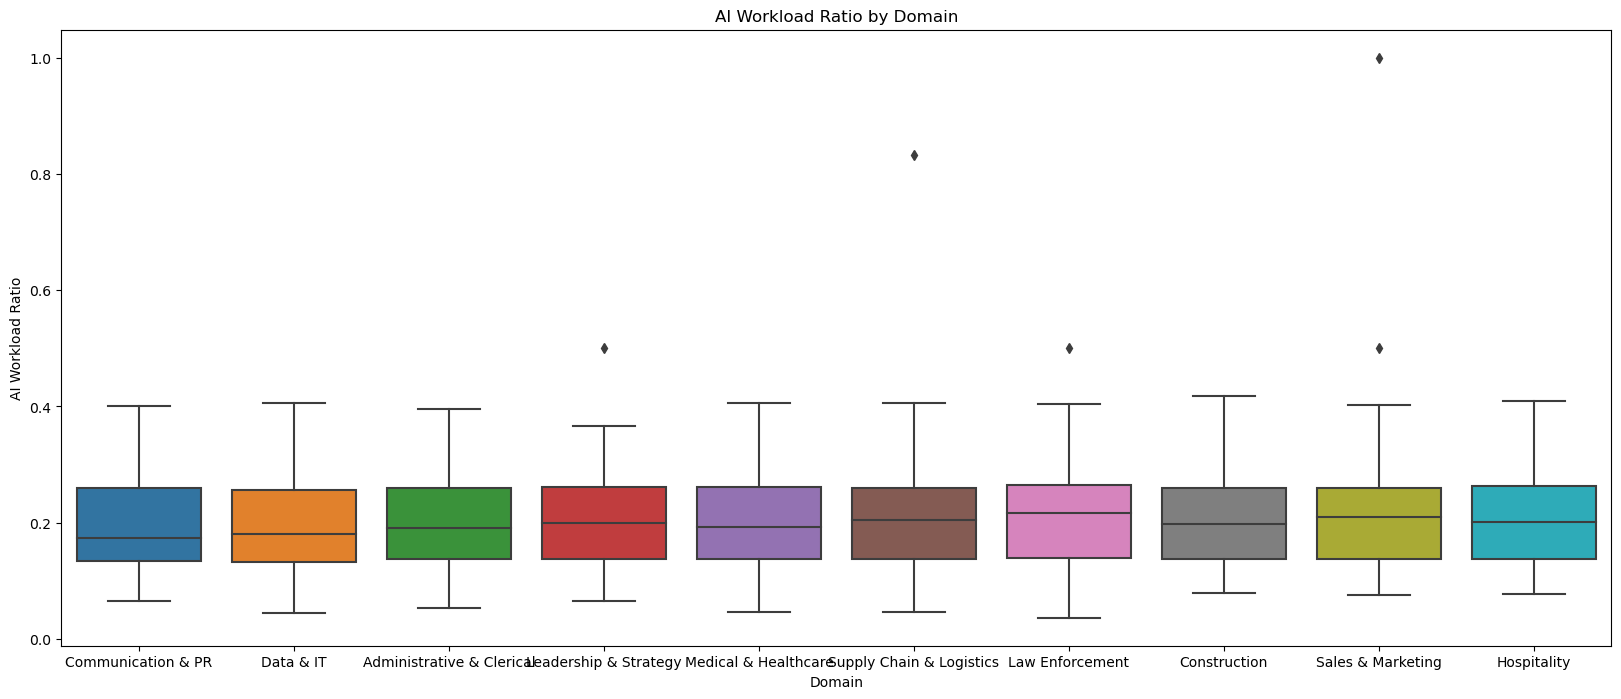

In [101]:
# Boxplot for numerical columns by Domain
plt.figure(figsize=(20, 8))
sns.boxplot(x='Domain', y='AI_Workload_Ratio', data=df)
plt.title('AI Workload Ratio by Domain')
plt.ylabel('AI Workload Ratio')
plt.show()

In [102]:
X = df[['AI Impact', 'Tasks', 'AI models']]
X

,AI Impact,Tasks,AI models
0,0.98,365,2546
1,0.95,299,2148
2,0.95,325,2278
3,0.95,193,1366
4,0.92,194,1369
...,...,...,...
4701,0.05,686,2798
4702,0.05,556,2206
4703,0.05,1316,4695
4704,0.05,710,2594


In [103]:
y = df['AI_Workload_Ratio']

In [104]:
y

0       0.143362
1       0.139199
2       0.142669
3       0.141288
4       0.141709
          ...   
4701    0.245175
4702    0.252040
4703    0.280298
4704    0.273709
4705    0.253378
Name: AI_Workload_Ratio, Length: 4706, dtype: float64

In [105]:
#splitting the data into trainnig and test set
X_train , X_test, y_train , y_test = train_test_split(X,y ,test_size=0.2 ,random_state=0)

In [106]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_train',y_test.shape)

X_train (3764, 3)
X_test (942, 3)
y_train (3764,)
y_train (942,)


In [107]:
#create a LinearRegression model
model = LinearRegression()

In [108]:
model.fit(X_train, y_train)


LinearRegression()

In [109]:
#print coefficinet
model.coef_

array([-0.03349408,  0.00054793, -0.00012375])

In [110]:
#print y_intercept

model.intercept_

0.22009555114776896

In [111]:
#make predictions usnig data
y_pred = model.predict(X_test.values)

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [112]:
y_pred

array([0.19276104, 0.27510895, 0.21074426, 0.12242687, 0.12020404,
       0.12613165, 0.10383615, 0.30665181, 0.14940102, 0.27883735,
       0.24720202, 0.15346365, 0.09898762, 0.32019488, 0.23775246,
       0.24721311, 0.15014787, 0.28308725, 0.33257897, 0.1667262 ,
       0.22458588, 0.18615901, 0.14817618, 0.2863439 , 0.23081892,
       0.16299342, 0.33560946, 0.13715433, 0.25532932, 0.32769186,
       0.21614521, 0.18455978, 0.3081596 , 0.1484947 , 0.20369096,
       0.10303557, 0.15736842, 0.18370412, 0.27502554, 0.16914794,
       0.18380923, 0.14702298, 0.25277475, 0.12782911, 0.0945723 ,
       0.13049362, 0.08344128, 0.22884196, 0.15975748, 0.0979255 ,
       0.14386525, 0.31276489, 0.14933121, 0.32734007, 0.23383757,
       0.15378113, 0.26253474, 0.12908022, 0.2421933 , 0.13937301,
       0.07997332, 0.11241355, 0.24535196, 0.30244439, 0.25957914,
       0.14485804, 0.22747753, 0.21271122, 0.17666196, 0.14025111,
       0.15683277, 0.20471923, 0.21145096, 0.25852577, 0.11024

In [113]:
#let's calculate the matrics
#MSE
mse = mean_squared_error(y_test,y_pred)
print('MSE---->',mse)

MSE----> 0.0007845795976243003


In [114]:
#R2
r2 = r2_score(y_test,y_pred)
print('R2---->',r2)

R2----> 0.8507629001941741


In [115]:
#MAE
mae = mean_absolute_error(y_test,y_pred)
print('MAE---->',mae)

MAE----> 0.021633564247647157


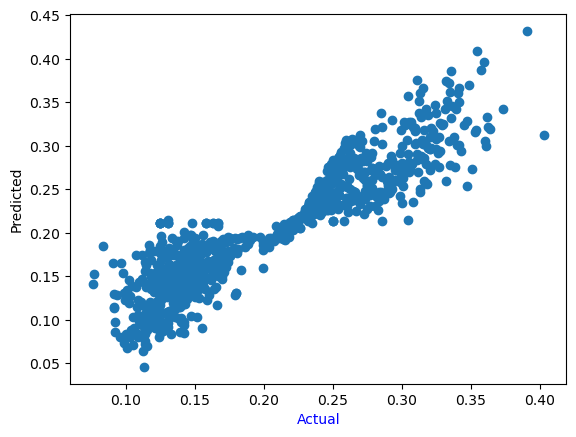

In [116]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.gca().xaxis.label.set_color('blue')
plt.show()

<Axes: xlabel='AI_Workload_Ratio'>

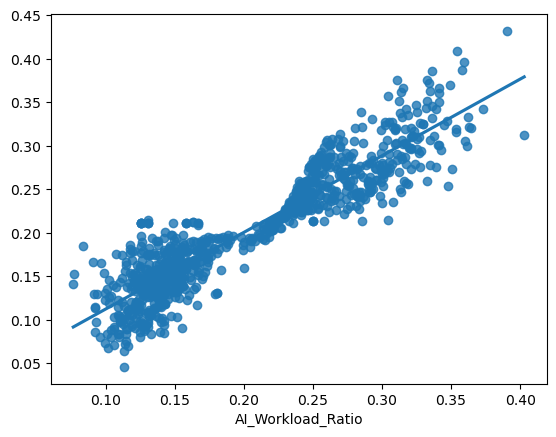

In [117]:
sns.regplot(x=y_test, y =y_pred, ci=None)

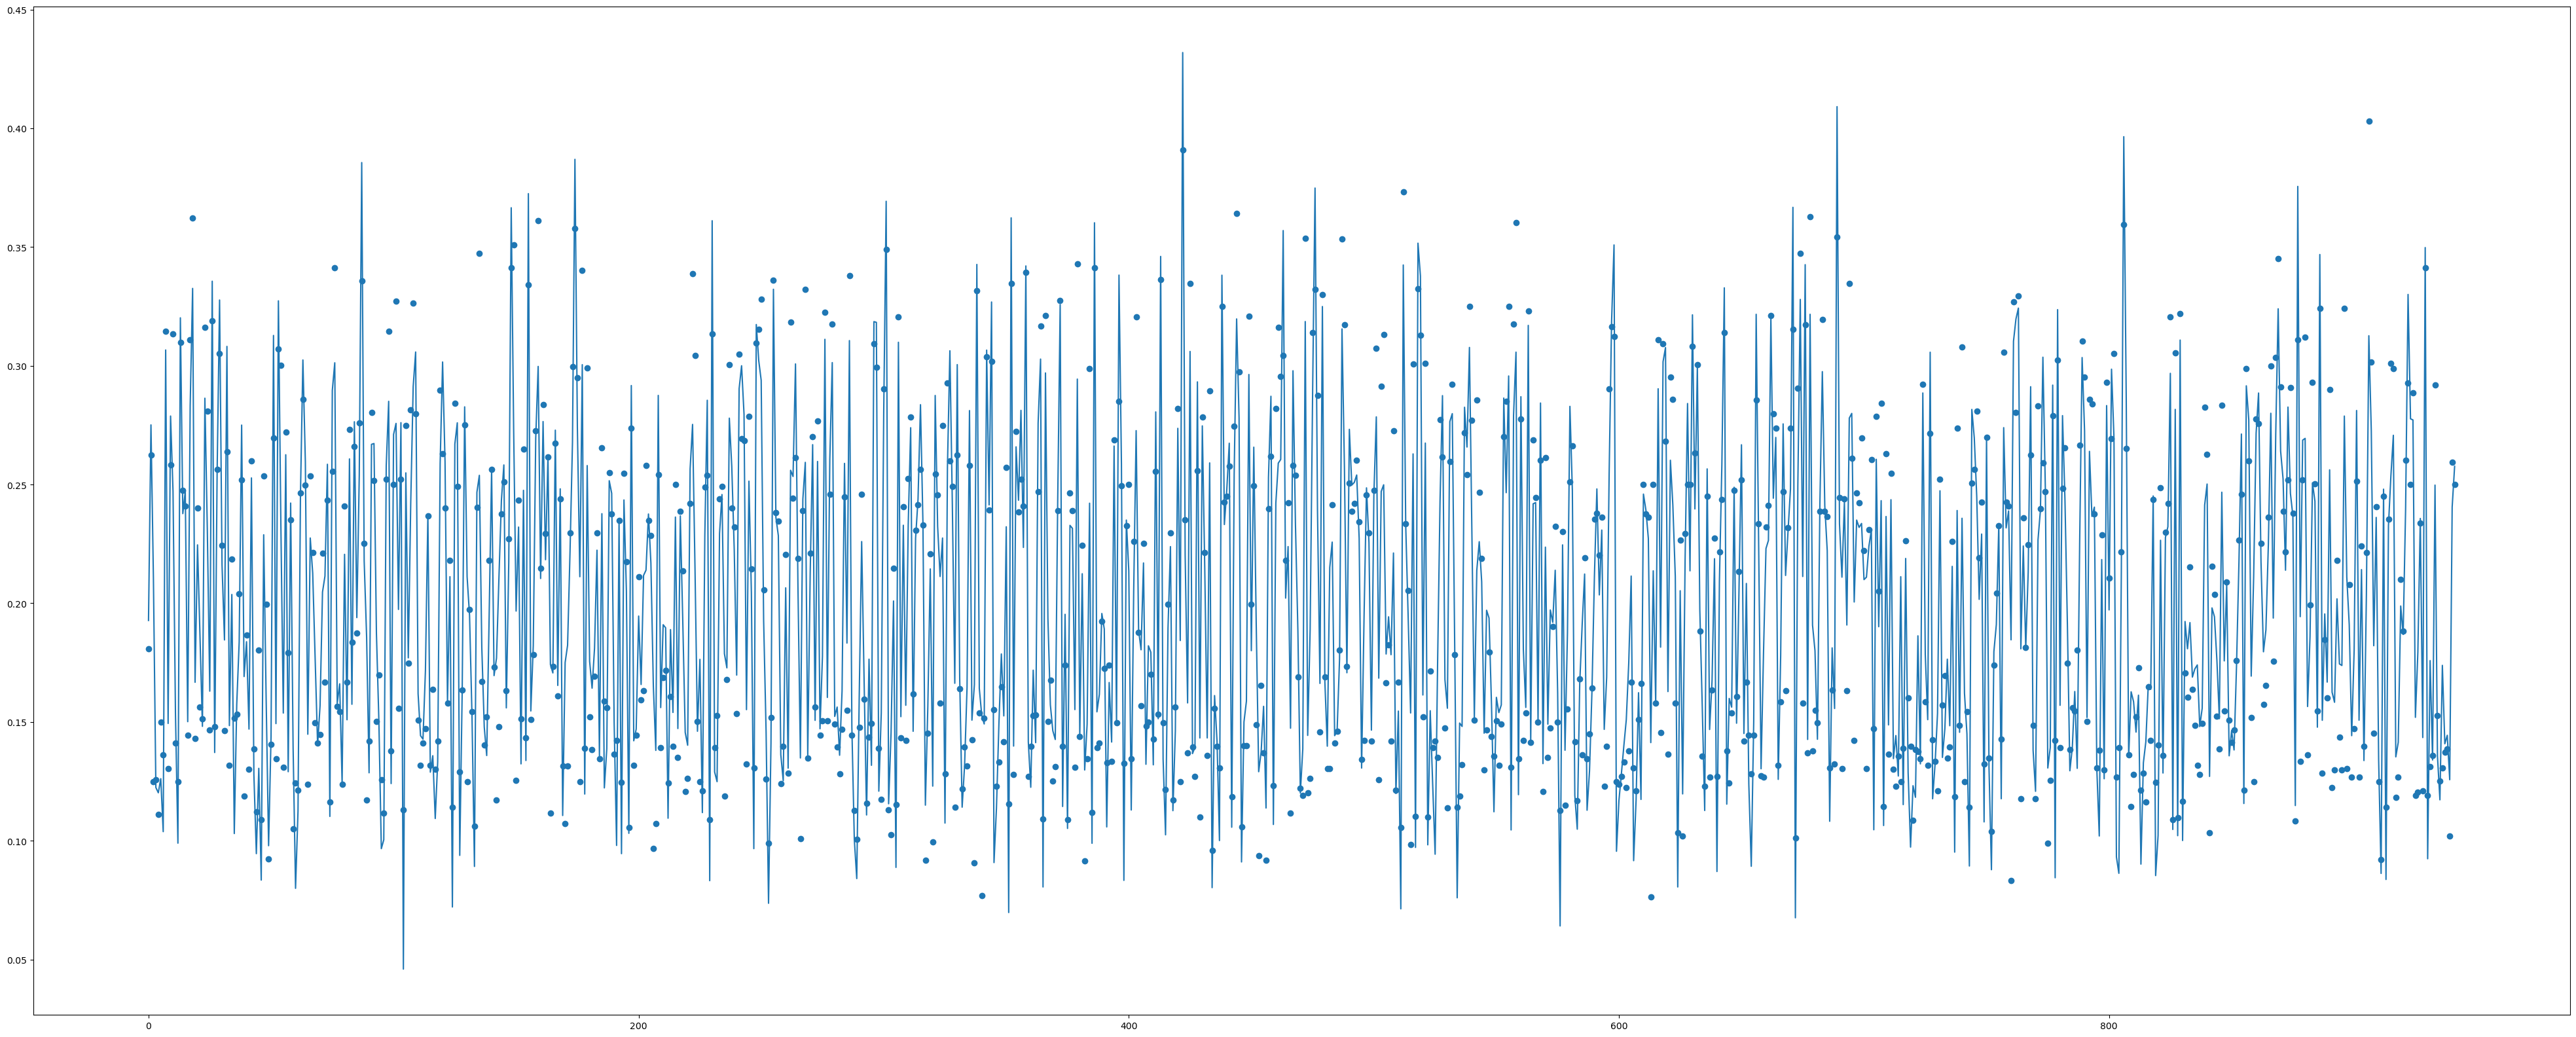

In [118]:
plt.figure(figsize=(50, 20))
plt.scatter(list(range(0,942)),y_test)
plt.plot(list(range(0,942)),y_pred)
plt.show()

In [119]:
len(y_pred)

942